# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [33]:
import csv
import sys
from os.path import join
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data_path="./data/"
color = ['b','g','r','c','m','y','k']
file_path_1 = join(data_path, "3-clusters.csv")
file_path_2 = join(data_path, "dataset-DBSCAN.csv")
file_path_3 = join(data_path, "CURE-complete.csv")

In [34]:
def load_data(file_path):
   with open(file_path) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')

       header = next(data_file)
       n_samples = int(header[0])
       n_features = int(header[1])
       feature_names = np.array(next(data_file))

       data_list = [iter for iter in data_file]
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return (data,feature_names,n_samples,n_features)

def plot_scatter(x, y, labels, title='Plot', colors=None, single_plot=True, **kwargs):
    if single_plot:
        fig = plt.figure(figsize=(8,8))
        plt.suptitle(title)
    plt.grid(True, alpha=0.4)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.scatter(x, y, marker='.', c=colors, **kwargs)
 
data1, feature_names1, n_samples1, n_features1 = load_data(file_path_1)
data2, feature_names2, n_samples2, n_features2 = load_data(file_path_2)
data3, feature_names3, n_samples3, n_features3 = load_data(file_path_3)

print(f"dataset n. 1 - n. samples: {n_samples1}, n. features: {n_features1}")
print(f"dataset n. 2 - n. samples: {n_samples2}, n. features: {n_features2}")
print(f"dataset n. 3 - n. samples: {n_samples3}, n. features: {n_features3}")

dataset n. 1 - n. samples: 150, n. features: 2
dataset n. 2 - n. samples: 6118, n. features: 2
dataset n. 3 - n. samples: 86558, n. features: 2


### Plot dataset n.1

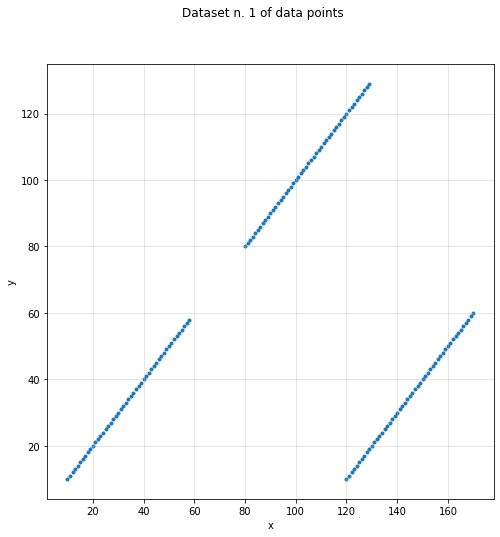

In [35]:
plot_scatter(data1[:,0], data1[:,1], feature_names1, title='Dataset n. 1 of data points')

### Plot dataset n.2

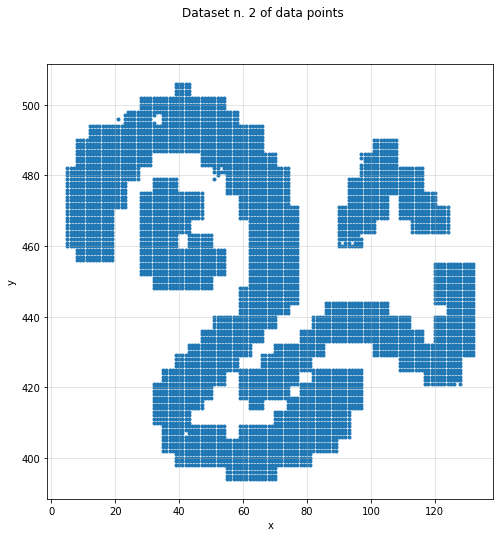

In [36]:
plot_scatter(data2[:,0], data2[:,1], feature_names2, title='Dataset n. 2 of data points')

### Plot dataset n.3

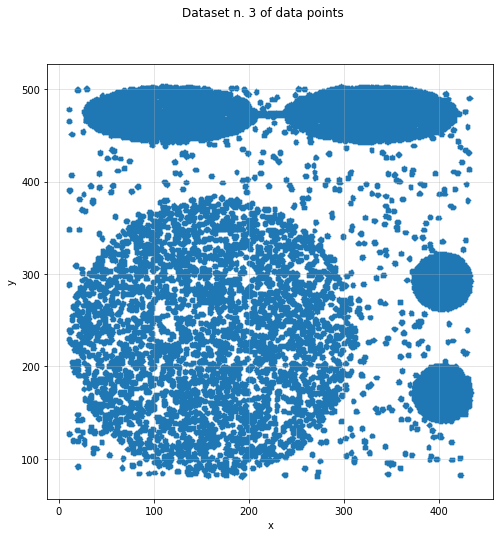

In [37]:
plot_scatter(data3[:,0], data3[:,1], feature_names3, title='Dataset n. 3 of data points', s=2)

### Clustering with K-means on the dataset n.1

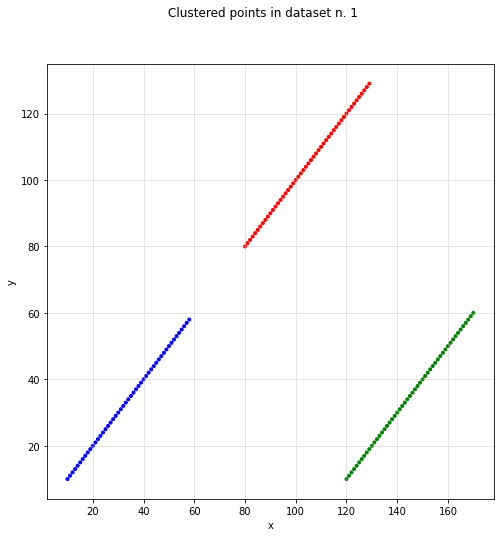

In [38]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data1)

cluster_labels = [color[kmeans.labels_[i]] for i in range(data1.shape[0])]
plot_scatter(data1[:,0], data1[:,1], feature_names1, title='Clustered points in dataset n. 1', colors=cluster_labels)

### Clustering with K-means & DBSCAN on the dataset n.2

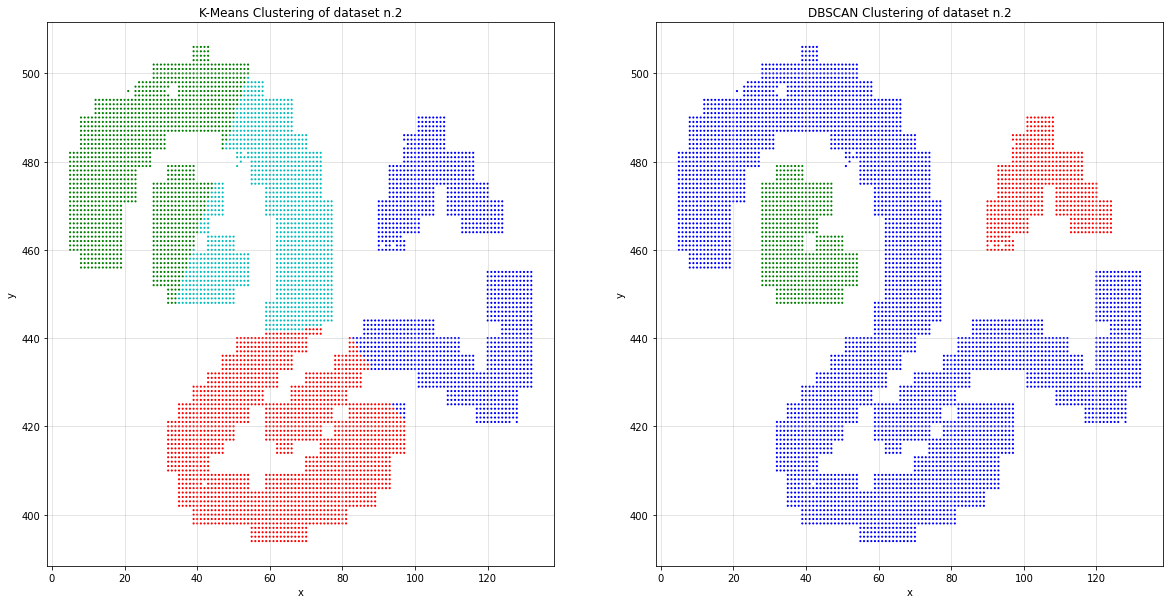

In [39]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(data2)
dbscan = DBSCAN(min_samples=10, eps=2.3).fit(data2)

km_cluster_labels = [color[kmeans.labels_[i]] for i in range(data2.shape[0])]
db_cluster_labels = [color[dbscan.labels_[i]] for i in range(data2.shape[0])]

fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title('K-Means Clustering of dataset n.2')
plot_scatter(data2[:,0], data2[:,1], feature_names2, colors=km_cluster_labels, single_plot=False, s=5)

plt.subplot(1, 2, 2)
plt.title('DBSCAN Clustering of dataset n.2')
plot_scatter(data2[:,0], data2[:,1], feature_names2, colors=db_cluster_labels, single_plot=False, s=5)

### Clustering with K-means & DBSCAN on the dataset n.3

In [40]:
k = 5

np.random.seed(300)
data3_subset = StandardScaler().fit_transform(np.random.permutation(data3)[:len(data3)//10])

kmeans = KMeans(n_clusters=k, random_state=0).fit(data3)
dbscan = DBSCAN(min_samples=400, eps=15).fit(data3)

km_cluster_labels = [color[kmeans.labels_[i]] for i in range(data3.shape[0])]
db_cluster_labels = [color[dbscan.labels_[i]] for i in range(data3.shape[0])]

fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title('K-Means Clustering of dataset n.3')
plot_scatter(data3[:,0], data3[:,1], feature_names3, colors=km_cluster_labels, single_plot=False, s=5)

plt.subplot(1, 2, 2)
plt.title('DBSCAN Clustering of dataset n.3')
plot_scatter(data3[:,0], data3[:,1], feature_names3, colors=db_cluster_labels, single_plot=False, s=5)

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [ ]:
from collections import defaultdict

def compute_silhouette(dataset, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=300).fit(dataset)
    
    cluster_labels = kmeans.predict(dataset)
    silhouette_avg = metrics.silhouette_score(dataset, cluster_labels)
    silhouette_samples = metrics.silhouette_samples(dataset, cluster_labels)

    return silhouette_avg, silhouette_samples, cluster_labels

def compute_silhouettes(dataset, max_clusters):
    result = defaultdict(dict)
    
    for i in range(2, max_clusters + 1):
        avg, samples, labels = compute_silhouette(dataset, i)
        result[i]['silhouette_avg'] = avg
        result[i]['silhouette_samples'] = samples
        result[i]['cluster_labels'] = labels
    
    return dict(result)

In [ ]:
max_clusters = 10
results = defaultdict(dict)

for i, dataset in enumerate([data1, data2, data3_subset]):
    results[i] = compute_silhouettes(dataset, max_clusters)

### Plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

In [ ]:
fig = plt.figure(figsize=(20, 7))

for i, result in results.items():
    x = [k for k, _ in result.items()]
    y = [v['silhouette_avg'] for _, v in result.items()]

    plt.subplot(1, 3, i+1)
    plt.grid(True, alpha=0.4)
    plt.xlabel('n_clusters')
    plt.ylabel('silhouette_avg')
    plt.title(f'Silhouettes for dataset n.{i+1}')
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.plot(x, y)

In [ ]:
for i, result in results.items():
    plt.figure(figsize=(20, 20))
    plt.suptitle(f'Silhouette analysis for dataset n.{i+1}', fontweight='bold', fontsize=14)

    for k, v in result.items():
        silhouette_avg = v['silhouette_avg']
        silhouette_samples = v['silhouette_samples']
        cluster_labels = v['cluster_labels']
        
        plt.subplot(3, 3, k-1)
        plt.xlabel('Silhouette coefficient values')
        plt.ylabel('Cluster labels')
        plt.title(f'k={k}, avg={silhouette_avg}')

        y_lower = 10
        for cluster in range(k+1):
            cluster_samples = silhouette_samples[cluster_labels == cluster]
            cluster_samples.sort()
            cluster_size = cluster_samples.shape[0]
            
            y_upper = y_lower + cluster_size

            plt.fill_betweenx(np.arange(y_lower, y_upper), cluster_samples)
            y_lower = y_upper + 10

### Let's take DBSCAN back
1. Set *Minpts* to a number (say **10**).
2. Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.